<a href="https://colab.research.google.com/github/jinyoung0711/DL_study/blob/master/DeepLearning_with_Keras_Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB 데이터셋을 이용한 이진 분류 예제




In [14]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

train_data와 test_data는 리뷰의 목록.

각 리뷰는 단어 인덱스의 리스트.

train_labels와 test_labels는 부정을 나타내는 0과 긍정을 나타내는 1의 리스트.

In [15]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

In [16]:
# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [17]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', # mean_squared_error도 가능. 확률을 출력하는 모델에서는 crossentropy가 최선의 선택
              metrics = ['accuracy'])

옵티마이저의 매개변수를 바꾸는 경우

In [19]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

자신만의 손실 함수, 측정 함수를 전달하는 경우

In [20]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [21]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [23]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 70ms/step - loss: 0.5252 - accuracy: 0.7759 - val_loss: 0.3996 - val_accuracy: 0.8681
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.3208 - accuracy: 0.9008 - val_loss: 0.3156 - val_accuracy: 0.8843
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2342 - accuracy: 0.9245 - val_loss: 0.2806 - val_accuracy: 0.8913
Epoch 4/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1814 - accuracy: 0.9427 - val_loss: 0.2786 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1485 - accuracy: 0.9531 - val_loss: 0.2789 - val_accuracy: 0.8877
Epoch 6/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1219 - accuracy: 0.9631 - val_loss: 0.2947 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 2s 57ms/step - loss: 0.0990 - accuracy: 0.9723 - val_loss: 0.3119 - val_accuracy: 0.8851
Epoch 8/20
30

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

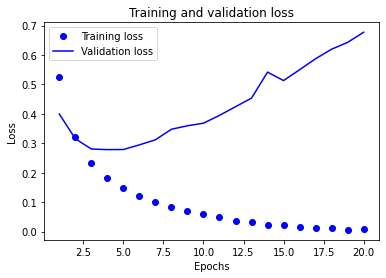

In [27]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

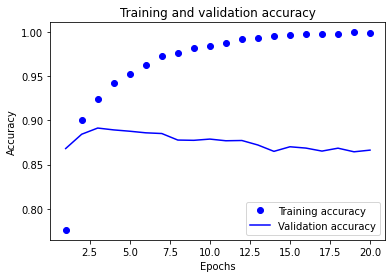

In [28]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

과대적합 (Overfitting) 
-> 방지하기 위해 세 번째 에포크 이후 훈련 중지

In [29]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 5s 59ms/step - loss: 0.4821 - accuracy: 0.8093
Epoch 2/4
49/49 [==============================] - 2s 34ms/step - loss: 0.2738 - accuracy: 0.9088
Epoch 3/4
49/49 [==============================] - 2s 50ms/step - loss: 0.2088 - accuracy: 0.9273
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2899 - accuracy: 0.8860


In [30]:
results

[0.2899336516857147, 0.8859999775886536]

In [31]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.17693314],
       [0.9999754 ],
       [0.7800426 ],
       ...,
       [0.1000893 ],
       [0.07541396],
       [0.5775172 ]], dtype=float32)

추가 실험 
1. 한 개 또는 세 개의 은닉층을 사용하고 검증과 테스트 정확도에 어떤 영향을 미치는지 확인해 보세요.

2. 층의 은닉 유닛을 추가하거나 줄여 보세요: 32개 유닛, 64개 유닛 등
binary_crossentropy 대신에 mse 손실 함수를 사용해 보세요.

3. relu 대신에 tanh 활성화 함수(초창기 신경망에서 인기 있었던 함수입니다)를 사용해 보세요.

## 추가 실험1

1. 한 개 또는 세 개의 은닉층을 사용하고 검증과 테스트 정확도에 어떤 영향을 미치는지 확인해 보세요.